The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

We can see that we have fraud transactions in class 1 and this class does not even account for 1% of the entire amount of transactions

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

credit=pd.read_csv('creditcard.csv')

In [5]:
#Credit_Info=credit.info()#284807 entries

Credit_Class=credit.Class.unique() #output class

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

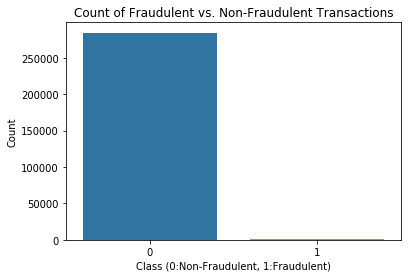

In [6]:

counts = credit.Class.value_counts()
non_fradulent = counts[0]
fraudulent = counts[1]
sns.barplot(x=counts.index, y=counts)

plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')


Text(0.5, 1.0, 'Correlation of the given dataset')

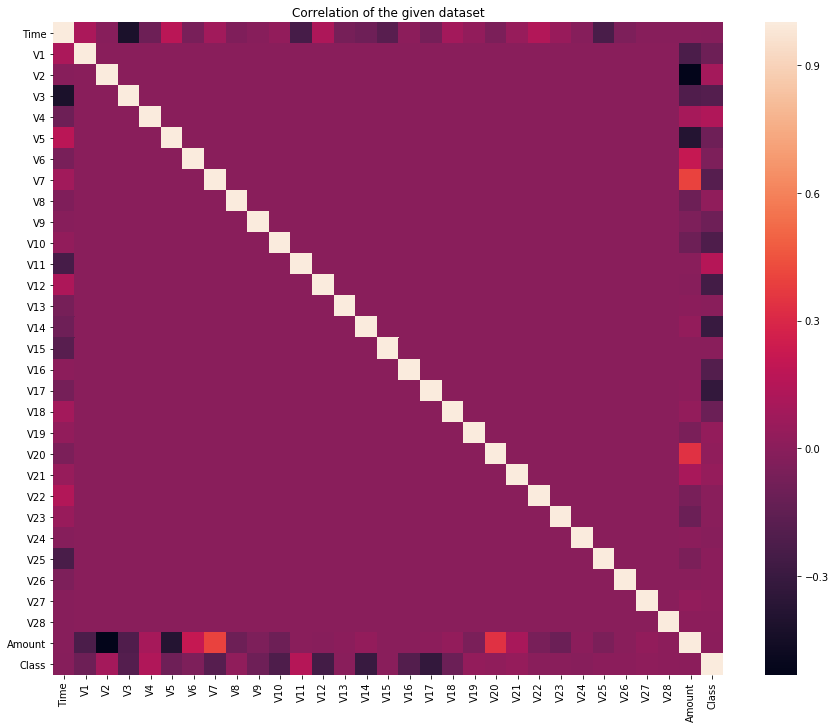

In [7]:
correlation=credit.corr()
plt.figure(figsize=(15,12))
heatmap= sns.heatmap(data=correlation)
plt.title('Correlation of the given dataset')

We can see that amount and time are not scaled. All other features are PCAs.

In [40]:
#why do we do standard scaling? So that they fit in a normal distribution that is 68% of our data is within the range of -1,1
scaler=StandardScaler()
scaled_time = scaler.fit_transform(credit[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)
#pandas series is a column in a excel
scaled_amount = scaler.fit_transform(credit[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [41]:
#dropping old amount and time columns
credit.drop(['Amount', 'Time'], axis=1, inplace=True)

#concatenating newly created columns w original df
credit = pd.concat([credit, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
credit.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
260192,-0.371657,1.063257,0.155099,-0.622386,0.392246,-0.896486,0.698969,-0.996814,0.105809,-0.232130,...,-0.808855,0.242468,-0.037650,-0.487044,0.139791,0.161280,0.094072,0,-0.346073,1.360913
30006,1.208624,-0.096072,0.716434,0.041390,-0.870281,-0.797339,-0.332170,0.007019,0.141315,0.033599,...,-0.276136,0.112354,0.565382,0.041265,0.844337,-0.076972,0.001751,0,-0.322724,-1.244120
199915,-0.075709,-0.564206,1.340279,-1.840078,-1.297715,-0.325404,-0.215576,-0.095825,-2.118567,0.939021,...,0.264027,-0.000305,-0.035234,-0.261220,0.016656,0.148200,0.141891,0,-0.041379,0.808269
53290,-0.747458,0.376414,1.519850,-1.750213,-0.593799,-0.809225,0.631782,-0.073207,-1.357389,0.121358,...,-0.884092,0.072570,0.320913,0.217034,-0.703888,0.088202,0.024436,0,-0.073363,-1.029898
255649,2.103744,0.297963,-2.655640,0.322840,0.987815,-1.299559,0.747150,-0.467689,-0.019922,-0.267596,...,0.022405,-0.000720,0.429953,0.285353,0.596728,-0.111476,-0.047162,0,-0.253997,1.316397


In [88]:
X= credit.drop(labels='Class', axis=1)
y = credit['Class']

#print the size of X and Y
X.shape,y.shape

#Split train-test data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.30)

So here we want to predict the minority class and given the lesser number of records available we are looking to balance the dataset. This can either be done by oversampling the minority class or undersampling the majority class. However over sampling can cause overfitting and undersampling results in losing some essential information.


# UnderSampling

In [54]:
#Undersampling
df_class_0 = credit[credit['Class'] == 0]
df_class_1 = credit[credit['Class'] == 1]

df_class_0_under = df_class_0.sample(fraudulent)


Random under-sampling:
1    492
0    492
Name: Class, dtype: int64


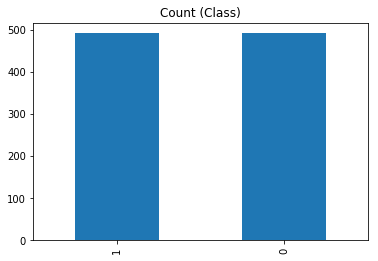

In [59]:
Train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(Train_under.Class.value_counts())

Train_under.Class.value_counts().plot(kind='bar', title='Count (Class)');

In [77]:
X_under = Train_under.drop(labels='Class', axis=1)
y_under = Train_under['Class']

#print the size of X and Y
X_under.shape,y_under.shape

#Split train-test data
from sklearn.model_selection import train_test_split
X_under_train, X_under_test,y_under_train, y_under_test = train_test_split(X_under,y_under,test_size=0.30)

#### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [79]:
lr_model.fit(X_under_train, y_under_train)

LogisticRegression()

In [90]:
# Predictions on training and testing data
lr_pred_under_train = lr_model.predict(X_under_train)
lr_pred_under_test = lr_model.predict(X_under_test)

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_under_test, lr_pred_under_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,128,10
Not Fraud,4,154


In [82]:
lr_under_accuracy = accuracy_score(y_under_test, lr_pred_under_test)
lr_under_accuracy

0.9527027027027027

In [83]:
lr_under_precision = precision_score(y_under_test, lr_pred_under_test)
lr_under_precision

0.9696969696969697

In [84]:
lr_under_recall = recall_score(y_under_test, lr_pred_under_test)
lr_under_recall

0.927536231884058

In [85]:

from sklearn.metrics import classification_report
print(classification_report(y_under_test, lr_pred_under_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       158
           1       0.97      0.93      0.95       138

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296



In [98]:
#Now let's check the model for the entire data instead of the sampled data

lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)


tn, fp, fn, tp = confusion_matrix(y_test, lr_pred_test).ravel()


conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix


,Predicted Fraud,Predicted Not Fraud
Fraud,148,9
Not Fraud,2757,82529


In [97]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)
print('Accuracy',lr_accuracy)

lr_precision = precision_score(y_test, lr_pred_test)
print('Precision',lr_under_precision)

lr_recall = recall_score(y_test, lr_pred_test)
print('Recall',lr_under_recall)

Accuracy 0.967627541167796
Precision 0.05094664371772806
Recall 0.9426751592356688


##### Random forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=30,criterion='entropy', random_state=0,max_depth=10)
RF.fit(X_under_train, y_under_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30,
                       random_state=0)

In [111]:
RF_pred_under_test = RF.predict(X_under_test)

tn, fp, fn, tp = confusion_matrix(y_under_test, RF_pred_under_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
print(conf_matrix)
print('\n')
lr_accuracy = accuracy_score(y_under_test, RF_pred_under_test)
print('Accuracy',lr_accuracy)

lr_precision = precision_score(y_under_test, RF_pred_under_test)
print('Precision',lr_under_precision)

lr_recall = recall_score(y_under_test, RF_pred_under_test)
print('Recall',lr_under_recall)

           Predicted Fraud  Predicted Not Fraud
Fraud                  124                   14
Not Fraud                4                  154


Accuracy 0.9391891891891891
Precision 0.05094664371772806
Recall 0.9426751592356688


#### KNN
##### Lazy algorithm as KNN does not have a training step. All data points will be used only at the time of prediction. With no training step, prediction step is costly. An eager learner algorithm eagerly learns during the training step.

In [113]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))
from sklearn.neighbors import KNeighborsClassifier

for i,k in enumerate(neighbours):
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    knn.fit(X_under_train,y_under_train.ravel())
    train_accuracy[i] = knn.score(X_under_train, y_under_train.ravel())
    test_accuracy[i] = knn.score(X_under_test, y_under_test.ravel())

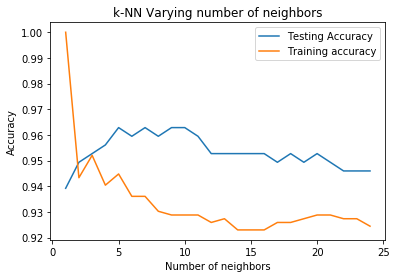

In [114]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [115]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [116]:
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_under_train,y_under_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [125]:
knn_predicted_test_labels=knn.predict(X_under_test)

tn, fp, fn, tp = confusion_matrix(y_under_test, knn_predicted_test_labels).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
print(conf_matrix)
print('\n')

           Predicted Fraud  Predicted Not Fraud
Fraud                  128                   10
Not Fraud                1                  157




In [124]:
knn_accuracy_score  = accuracy_score(y_under_test,knn_predicted_test_labels)
print('knn accuracy for undersampling:',knn_accuracy_score)
knn_precison_score  = precision_score(y_under_test,knn_predicted_test_labels)
print('knn precision for undersampling:',knn_precison_score)
knn_recall_score    = recall_score(y_under_test,knn_predicted_test_labels)
print('knn recall for undersampling:',knn_recall_score)

knn accuracy for undersampling: 0.9628378378378378
knn precision for undersampling: 0.9922480620155039
knn recall for undersampling: 0.927536231884058


# Deep Neural Networks

In [132]:
 !pip install keras

In [137]:
!pip install tensorflow

  Stored in directory: C:\Users\KRISHNA\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\KRISHNA\AppData\Local\pip\Cache\wheels\b1\c2\ed\d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
Successfully built termcolor wrapt
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0
  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2


tables 3.5.1 requires mock>=2.0, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
astroid 2.2.5 requires typed-ast>=1.3.0; implementation_name == "cpython", which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\krishna\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [141]:
!pip install tensorflow.python

  Could not find a version that satisfies the requirement tensorflow.python (from versions: )
No matching distribution found for tensorflow.python
